# Titanic: Machine Learning from Disaster (Kaggle)
https://www.kaggle.com/c/titanic

### Competition Description (from Kaggle):
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Overview of Dataset

The data have been divided into two groups:
* Training set (train.csv)
* Testing set (test.csv)

Note that the training set includes the ground truth for each passenger (here, survival outcome). The test set does **not** include the ground truth for the passengers.

A file named **gender_submission.csv** is also included, which is a set of predictions that assume that all and only remal passengers survive as an example of what the Kaggle submission file should look like.

#### Data Dictionary 
|Variable  |Definition  |Key                |
|----------|------------|-------------------|
|survival  |Survival    |0=no, 1=yes        |
|pclass    |Ticket class|1=1st, 2=2nd,<br>3=3rd|
|sex       |Sex         |                   |
|Age       |Age in years|                   |
|sibsp     |# of siblings/spouses<br>aboard the titanic||
|parch     |# of parents/children<br>aboard the titanic||
|ticket    |Ticket number||
|fare      |Passenger fare||
|cabin     |Cabin number||
|embarked  |Port of Embarkation|C = Cherbourg, Q = Queenstown<br>S=Southampton||

#### Variable Notes
**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper Class
* 2nd = Middle Class
* 3rd = Lower Class

**age**: Age is fractional if < 1. If estimated, it is in the form of xx.5.

**sibsp**: Family relations defined as follows:
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiances ignored)

**parch**: Family relations defined as follows:
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children traveled with only a nanny; thus, **parch**=0

### Some considerations based on my knowledge of the event

It is known that passengers were told _women and children first_ during the evactuation; thus, I would expect women and children to have a higher probability of survival. Although not included in this dataset, I'd expect crew members to have a lower probability of survival given that they assisted passengers in loading lifeboats.

Regarding the variables:
* **pclass** -- I'd expect the survival probability to follow the order Upper > Middle > Lower.
* **age** -- This variable can be used to distinguish children from adults. I'd expect survival probability to follow the order Children > Adults.
* **sex** -- I'd expect survival probability to follow the order Female > Male.
* **sibsp** -- This variable indicates siblings. I'd expect that if one sibling survived, then the probability of another sibling surviving is greater as they are likely to be together. I do not expect husband/wife to be greatly correlated as I'd expect the probability of a wife surviving to be greater than that of her husband surviving.
* **parch** -- I'd expect that if a child survives, the probability of their mother surviving is greater than that of a single female or of a mother who's child did not survive (given that the mother is likely to be with her children).
* **ticket** -- I'm not familiar with how ticket numbers worked with the Titanic; however, I'd assume that lower ticket numbers correlate to those that were first sold and are thus most likely to be related with the upper class (as they'd be more apt to buy tickets ASAP)
* **fare** -- I'd expect higher fare to be correlated with a greater probability of survival
* **cabin** -- I'm not familiar with the cabin numbers aboard the Titanic; however, appears to correlate with deck (deeper decks less likely to survive).
* **embarked** -- According to Wikipedia (https://en.wikipedia.org/wiki/RMS_Titanic#Collecting_passengers), Southampton was the first port of departure, and a large number of first class passengers boarded the ship. A moderate number of first class passengers also boarded in Cherbourg, whereas most of the passengers who boarded the ship in Queenstown were third class passengers.


# Loading datasets and exploratory analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Loading the data and seeing what we're working with.

In [5]:
training_data = pd.read_csv('train.csv')
training_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualizing the data in terms of survival:

In [97]:
Pclass_survived = training_data[training_data['Survived']==1]['Pclass']
Pclass_deceased = training_data[training_data['Survived']==0]['Pclass']

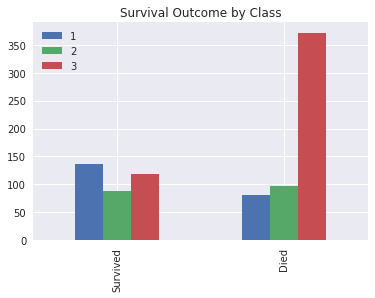

In [115]:
Pclass_outcome = pd.DataFrame([Pclass_survived.value_counts(), Pclass_deceased.value_counts()], index=['Survived', 'Died'])
Pclass_outcome.plot(kind='bar', stacked=False, title='Survival Outcome by Class');

The above plot supports my initial hypothesis that there is a correlation with the passenger's social status and their probability of survival (third class passengers clearly had a higher probability of dying).

Visualizing data in terms of sex:

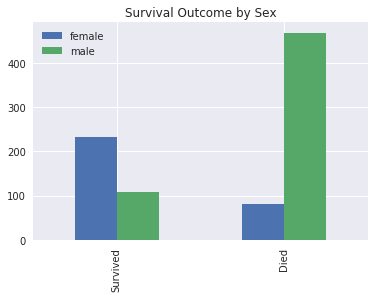

In [116]:
sex_survived = training_data[training_data['Survived']==1]['Sex']
sex_deceased = training_data[training_data['Survived']==0]['Sex']
sex_outcome = pd.DataFrame([sex_survived.value_counts(), sex_deceased.value_counts()],
                          index=['Survived', 'Died'])
sex_outcome.plot(kind='bar', stacked=False, title="Survival Outcome by Sex");

The above plot supports my initial hypothesis that survival is correlated with sex, namely, male passengers were more likely to die than female passengers.

Visualizing the data in terms of port of embarkation:

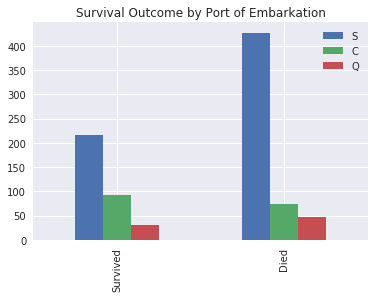

In [117]:
embark_survived = training_data[training_data['Survived']==1]['Embarked']
embark_deceased = training_data[training_data['Survived']==0]['Embarked']
embark_outcome = pd.DataFrame([embark_survived.value_counts(), embark_deceased.value_counts()], 
                             index=['Survived', 'Died'])
embark_outcome.plot(kind='bar', title='Survival Outcome by Port of Embarkation');